In [9]:
from cgtasknet.net.alif_one_layer import SNNAlif, SNNAlifOneState, SNNAlifStates
from cgtasknet.tasks.tasks import MultyTask
import torch
from norse.torch.functional.lif_adex import LIFAdExParameters, LIFAdExState
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

feature_size = 8
output_size = 5
hidden_size = 400
batch_size = 1
task_list = [("WorkingMemory", dict()), (("ContextDM", dict()))]
tasks = dict(task_list)
Task = MultyTask(tasks, batch_size=batch_size)
# inputs, labels, ob_size, act_size = CDM_task.dataset()


feature_size, output_size = Task.feature_and_act_size[0]
hidden_size = 400

# 1. model


neuron_parameters = LIFAdExParameters(
    tau_ada_inv=torch.Tensor([2]).to(device), alpha=100
)

model = SNNAlifOneState(
    feature_size, hidden_size, output_size, neuron_parameters=neuron_parameters
).to(device)
state = LIFAdExState(
    torch.zeros((batch_size, hidden_size)).to(device),
    torch.zeros((batch_size, hidden_size)).to(device),
    torch.zeros((batch_size, hidden_size)).to(device),
    torch.zeros((batch_size, hidden_size)).to(device),
)
model.load_state_dict(torch.load("./saved_models/two_task/1_0_two_task"))
inputs, target_outputs = Task.dataset(10)
inputs[:, :, 0] = 1
inputs += np.random.normal(0, 0.01, size=(inputs.shape))
inputs = torch.from_numpy(inputs).type(torch.float32).to(device)

states = SNNAlifStates(model)
outputs, v, z = states.generate_states(inputs)

In [10]:
outputs = outputs.detach().cpu()
v = v.detach().cpu()
z = z.detach().cpu()

In [11]:
outputs = outputs.reshape((outputs.shape[0], outputs.shape[2]))
z = z.reshape((z.shape[0], z.shape[2]))
v = v.reshape((v.shape[0], v.shape[2]))

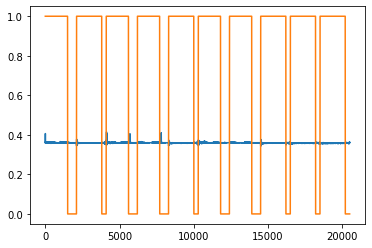

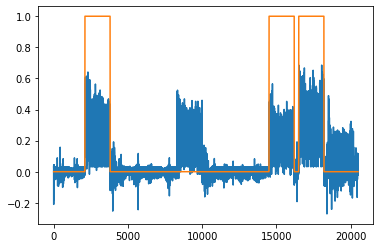

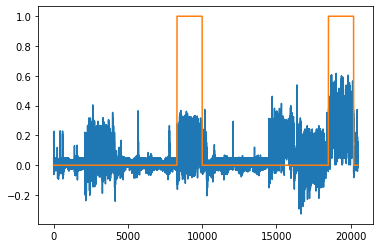

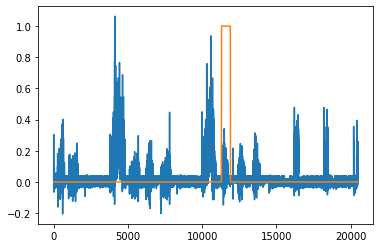

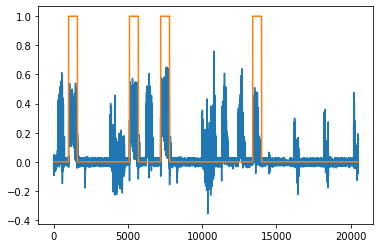

In [12]:
plt.plot(outputs.numpy()[:, 0])
plt.plot(target_outputs[:, 0, 0])
plt.show()
plt.close()
plt.plot(outputs.numpy()[:, 1])
plt.plot(target_outputs[:, 0, 1])
plt.show()
plt.close()
plt.plot(outputs.numpy()[:, 2])
plt.plot(target_outputs[:, 0, 2])
plt.show()
plt.close()
plt.plot(outputs.numpy()[:, 3])
plt.plot(target_outputs[:, 0, 3])
plt.show()
plt.close()
plt.plot(outputs.numpy()[:, 4])
plt.plot(target_outputs[:, 0, 4])
plt.show()
plt.close()

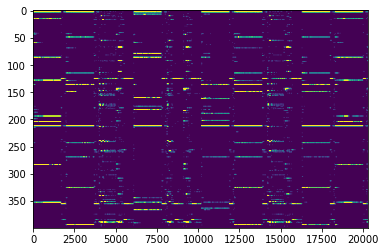

In [5]:
plt.imshow(z.T, aspect="auto", vmax=0.1, vmin=0)

In [6]:
device

device(type='cpu')

In [7]:
outputs[:]

tensor([[ 0.3590,  0.0451,  0.0312,  0.0401,  0.0426],
        [ 0.3590,  0.0451,  0.0312,  0.0401,  0.0426],
        [ 0.3597,  0.0863,  0.3502,  0.0015, -0.0254],
        ...,
        [ 0.3507,  0.0995,  0.0647, -0.0108, -0.0036],
        [ 0.3515,  0.0250,  0.0180,  0.1395,  0.1178],
        [ 0.3550,  0.0159,  0.0199,  0.1150,  0.1527]])

In [8]:
v

tensor([[ 0.0284,  0.0006,  0.0644,  ..., -0.0076,  0.0127,  0.0011],
        [ 0.0996, -0.0372,  0.2775,  ..., -0.0765,  0.0218, -0.0345],
        [ 0.1890, -0.0946,  0.5634,  ..., -0.1746,  0.0295, -0.0861],
        ...,
        [ 0.0203, -0.2102,  0.2365,  ...,  0.0633, -0.0213, -0.0058],
        [ 0.0051, -0.2243,  0.3580,  ...,  0.0433, -0.0630,  0.0157],
        [-0.0368, -0.2478,  0.4848,  ...,  0.0472, -0.1387,  0.0882]])

In [9]:
z

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])